In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
# show plots inline
%matplotlib inline

In [ ]:
data = pd.data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1)
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,6.9,3.1,5.1,2.3,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [ ]:
#Visualize data
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0             5.1           3.5            1.4           0.2
46            5.1           3.8            1.6           0.2
1             4.9           3.0            1.4           0.2
79            5.7           2.6            3.5           1.0
3             4.6           3.1            1.5           0.2
123     Iris-virginica
129     Iris-virginica
70     Iris-versicolor
88     Iris-versicolor
31         Iris-setosa
Name: Species, dtype: object


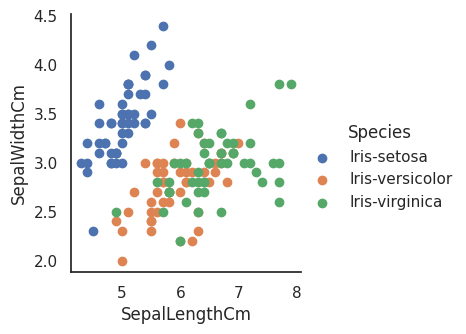

In [ ]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", height = 3.5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

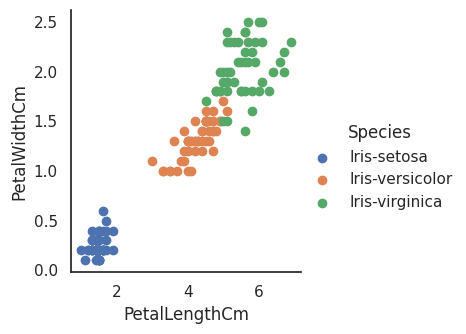

In [ ]:
# do same for petals
sns.FacetGrid(data, hue="Species", height=3.5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

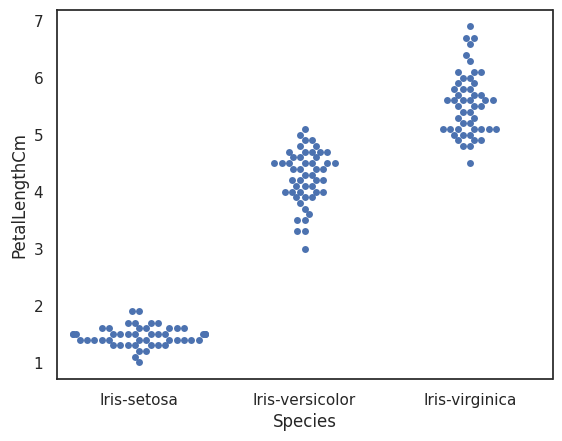

In [ ]:
#Petal_length distribution using swarm plots
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid

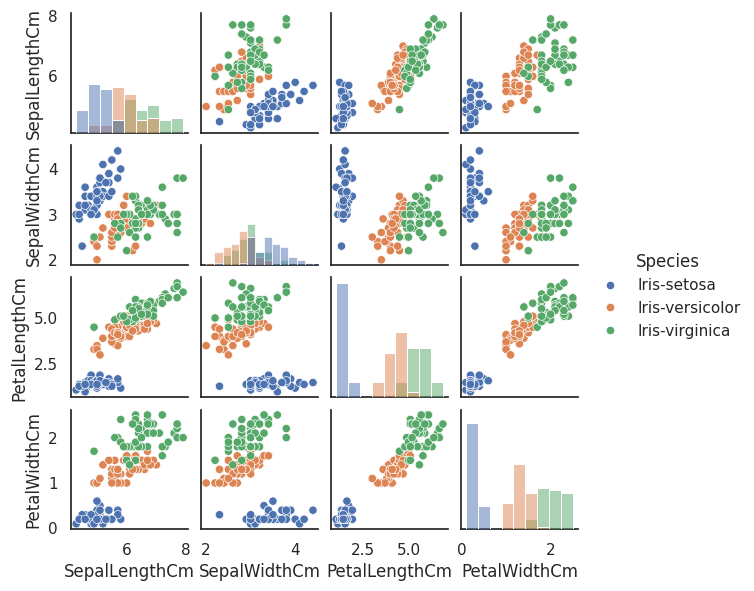

In [ ]:
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.5);

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
147,0.795669,-0.124958,0.819624,1.053537
98,-0.900681,-1.281972,-0.431421,-0.129720
60,-1.021849,-2.438987,-0.147093,-0.261193
121,-0.294842,-0.587764,0.649027,1.053537
91,0.310998,-0.124958,0.478430,0.264699


In [ ]:
###K_Means Clustering
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
##Evaluating the performance of k_means clustering
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

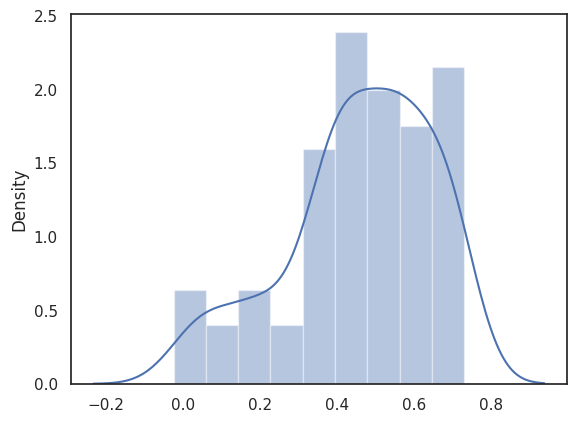

In [ ]:
# note that this is the mean over all the samples - there might be some clusters
# that are well separated and others that are closer together.
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

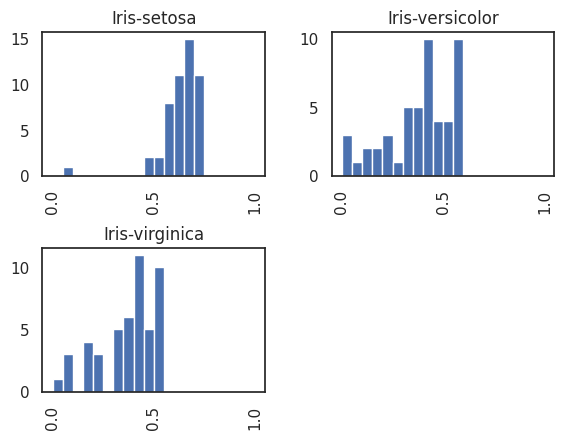

In [ ]:
# can we add the species info to that plot?
# well, can plot them separately using pandas -
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

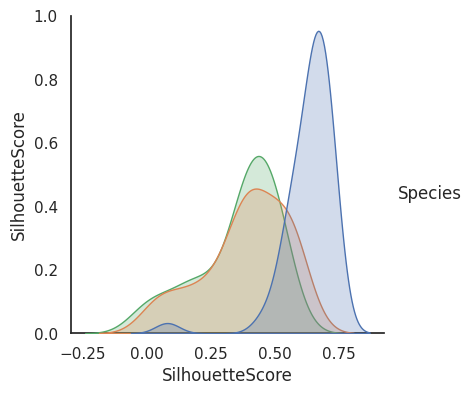

In [ ]:
sns.pairplot(df_scores, hue="Species", size=4);

In [ ]:
from sklearn.decomposition import PCA
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
96,0.224357,-0.380485
144,2.001691,1.048550
73,0.629381,-0.416812
61,0.438730,-0.058881
60,-0.124697,-2.658063


In [ ]:
y_id_array = pd.Categorical(data['Species']).codes
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
20,-1.914556,0.430465,1,0
91,0.623171,0.027543,0,1
23,-1.820412,0.106751,1,0
117,2.437378,2.556757,2,2
137,1.347044,0.422256,2,2


In [ ]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter',
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

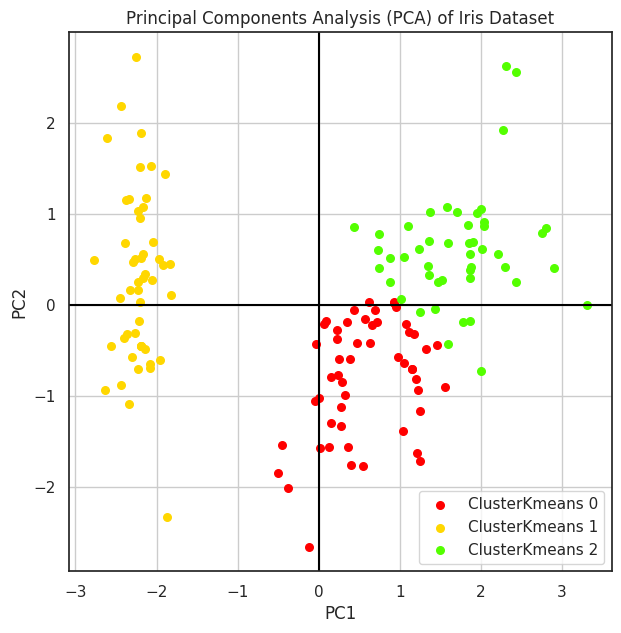

In [ ]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

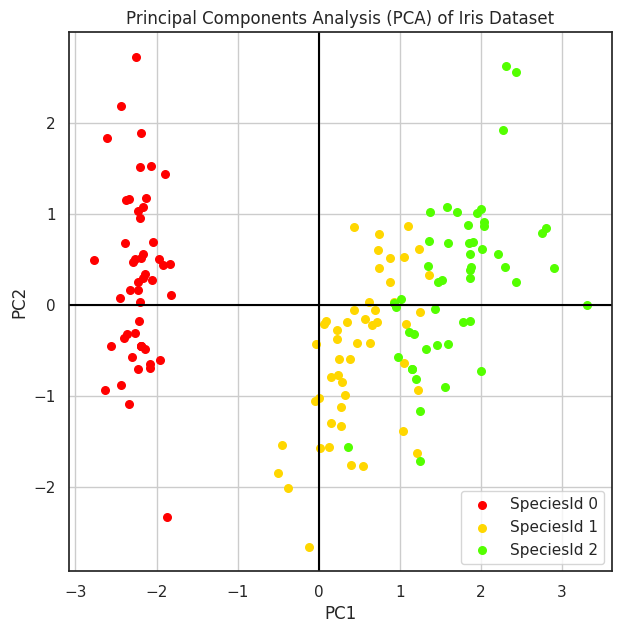

In [ ]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'SpeciesId')

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

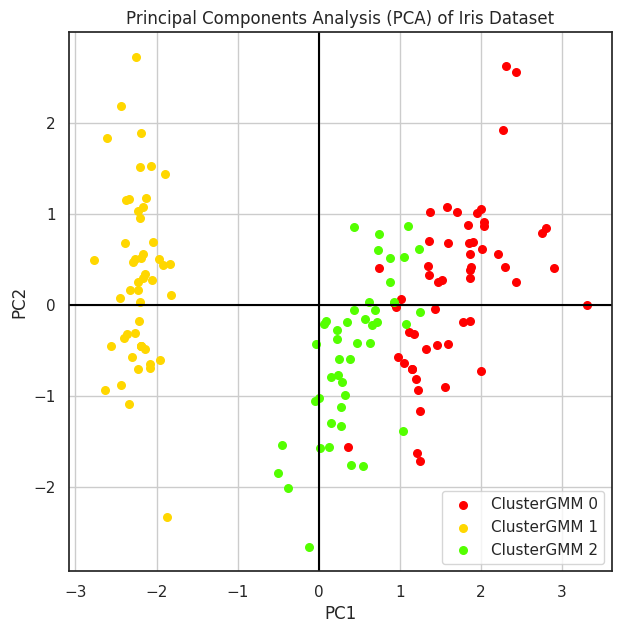

In [ ]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
# first let's see how the k-means clustering did -
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

In [ ]:
# now the GMM clustering -
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124